# Sentiment Analysis on IMDB Movie Reviews Dataset

In [1]:
import pandas as pd
import numpy as np
import re

import nltk
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\shahv\Downloads\IMDB Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Preprocessing

In [4]:
#Removing null values
data=data.dropna()
data = data.reset_index(drop=True)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
#Positive - 1, Negative - 0
data['label']=np.where(data['sentiment']=='positive',1,0)
data.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [6]:
#Lower casing
data['pre_process'] = data['review'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
data.head()

,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"petter mattei's ""love in the time of money"" is..."


In [7]:
#Remove the HTML tags and URLs from the reviews.
data['pre_process']=data['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(r'http\S+', '', x))
data.head()

C:\Users\shahv\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"petter mattei's ""love in the time of money"" is..."


In [8]:
#Removing word contractions
def contractions(s):
    s = re.sub(r"won't", "will not",s)
    s = re.sub(r"would't", "would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s= re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))
data.head()

,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"petter mattei is ""love in the time of money"" i..."


In [9]:
#Removing non-alpha characters
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))
data.head()

,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei is love in the time of money i...


In [10]:
#Removing extra spaces
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))
data.head()

,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei is love in the time of money is ...


In [11]:
#Removing stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
data.head()

,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...


In [12]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
data.head()

,review,sentiment,label,pre_process
0,One of the other reviewers has mentioned that ...,positive,1,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visually stunnin...


## Visualizations

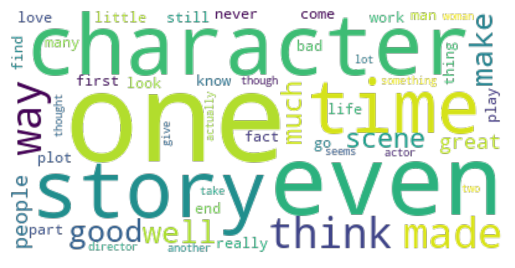

In [24]:
text = " ".join(review for review in data.pre_process)

stopwords =  set(STOPWORDS)
stopwords.update(['movie', 'film', 'show', 'see', 'watch', 'seen', 'seem', 'say'])

#Generate a wordcloud image
wordcloud = WordCloud(mode = 'RGBA', max_font_size = 100, stopwords = stopwords, max_words = 50, 
                      background_color = None).generate(text)

#Display the generated image the matplotlib way
plt.imshow(wordcloud, interpolation = 'mitchell')
plt.axis('off')
plt.show()

## Word Embedding Matrix (TF-IDF)

In [15]:
#Splitting into train and test datasets
X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (37500,) (37500,) Test:  ((12500,), (12500,))


In [16]:
print("TFIDF Vectorizer")
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)
tf_x_train

TFIDF Vectorizer


<37500x143510 sparse matrix of type '<class 'numpy.float64'>'
	with 3537374 stored elements in Compressed Sparse Row format>

## Model Building

In [17]:
#Using SVM algorithm
svm = LinearSVC(random_state=0)

#Fitting the Training data into model
svm.fit(tf_x_train,Y_train)

#Predicting the test data
y_test_pred_svm=svm.predict(tf_x_test)
y_test_pred_svm

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
#Using Logistic Regression
lr = LogisticRegression(max_iter=1000,solver='saga')

#Fitting the Training data into model
lr.fit(tf_x_train,Y_train)

y_test_pred_lr=lr.predict(tf_x_test)
y_test_pred_lr

array([1, 1, 1, ..., 0, 0, 0])

## Testing model performance

In [19]:
#SVM Model Accuracy
report=classification_report(Y_test, y_test_pred_svm,output_dict=True)
report

{'0': {'precision': 0.9039631639532971,
  'recall': 0.8796607457193151,
  'f1-score': 0.8916463909164638,
  'support': 6249},
 '1': {'precision': 0.8828477956067924,
  'recall': 0.9065749480083186,
  'f1-score': 0.8945540647198106,
  'support': 6251},
 'accuracy': 0.89312,
 'macro avg': {'precision': 0.8934054797800448,
  'recall': 0.8931178468638168,
  'f1-score': 0.8931002278181372,
  'support': 12500},
 'weighted avg': {'precision': 0.8934037905505771,
  'recall': 0.89312,
  'f1-score': 0.8931004604320414,
  'support': 12500}}

In [20]:
#Logistic Regression Accuracy
report=classification_report(Y_test, y_test_pred_lr,output_dict=True)
report

{'0': {'precision': 0.9049586776859504,
  'recall': 0.8761401824291887,
  'f1-score': 0.8903162858769005,
  'support': 6249},
 '1': {'precision': 0.88,
  'recall': 0.9080147176451767,
  'f1-score': 0.8937878907172663,
  'support': 6251},
 'accuracy': 0.89208,
 'macro avg': {'precision': 0.8924793388429753,
  'recall': 0.8920774500371826,
  'f1-score': 0.8920520882970834,
  'support': 12500},
 'weighted avg': {'precision': 0.8924773421487604,
  'recall': 0.89208,
  'f1-score': 0.8920523660254706,
  'support': 12500}}